In [43]:
import seaborn as sns
import pandas as pd
import statistics as stc
import numpy as npy
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
df = pd.read_csv('amzn_raw_data.csv', index_col=0)


In [45]:
df.head()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
1997-05-15,29.256,30.000,23.124,23.496,6008999,0.0979,NaN,NaN
1997-05-16,23.628,23.748,20.496,20.748,1224999,0.0865,-11.64,NaN
1997-05-19,21.120,21.252,19.500,20.496,508899,0.0854,-1.27,NaN
1997-05-20,20.748,21.000,19.620,19.620,455599,0.0818,-4.22,NaN
1997-05-21,19.620,19.752,16.500,17.124,1571099,0.0714,-12.71,NaN


In [46]:
df.shape


(6743, 8)

### Mostrar informacion basica del dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6743 entries, 1997-05-15 to 2024-03-01
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            6743 non-null   float64
 1   high            6743 non-null   float64
 2   low             6743 non-null   float64
 3   close           6743 non-null   float64
 4   volume          6743 non-null   int64  
 5   adjusted_close  6743 non-null   float64
 6   change_percent  6742 non-null   float64
 7   avg_vol_20d     6724 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 474.1+ KB


### Describe los datos de manera estadististica

In [48]:
df.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,6743.000000,6743.000000,6743.000000,6743.000000,6.743000e+03,6743.000000,6742.000000,6.724000e+03
mean,557.764646,564.330196,550.521124,557.556973,9.782548e+06,35.114015,0.173714,1.394389e+08
std,907.527950,917.470361,896.168758,906.763703,1.580062e+07,50.967317,3.564684,1.003812e+08
min,5.910000,6.100000,5.510000,5.970000,2.230000e+04,0.069800,-24.770000,2.534160e+07
25%,47.348000,48.497000,46.135000,47.376000,3.426878e+06,2.054250,-1.310000,7.427122e+07
50%,127.760000,129.930000,125.400000,127.610000,5.373099e+06,7.853000,0.045000,1.139504e+08
75%,530.040000,537.365000,523.425000,531.465000,8.366862e+06,48.251250,1.480000,1.663014e+08
max,3744.000100,3773.078100,3696.793100,3731.410100,2.231334e+08,186.570500,34.470000,8.328822e+08


### Revisar la cantidad de datos nulos

In [49]:
df.isnull()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
1997-05-15,False,False,False,False,False,False,True,True
1997-05-16,False,False,False,False,False,False,False,True
1997-05-19,False,False,False,False,False,False,False,True
1997-05-20,False,False,False,False,False,False,False,True
1997-05-21,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
2024-02-26,False,False,False,False,False,False,False,False
2024-02-27,False,False,False,False,False,False,False,False
2024-02-28,False,False,False,False,False,False,False,False


In [50]:
df.isnull().sum().to_frame()

,0
open,0
high,0
low,0
close,0
volume,0
adjusted_close,0
change_percent,1
avg_vol_20d,19


### Limpieza de datos


In [51]:
df['volume'] = df['volume'].round(5)


In [52]:
df.head()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
1997-05-15,29.256,30.000,23.124,23.496,6008999,0.0979,NaN,NaN
1997-05-16,23.628,23.748,20.496,20.748,1224999,0.0865,-11.64,NaN
1997-05-19,21.120,21.252,19.500,20.496,508899,0.0854,-1.27,NaN
1997-05-20,20.748,21.000,19.620,19.620,455599,0.0818,-4.22,NaN
1997-05-21,19.620,19.752,16.500,17.124,1571099,0.0714,-12.71,NaN


In [53]:
df.fillna(0, inplace=True)

In [54]:
df.head()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
1997-05-15,29.256,30.000,23.124,23.496,6008999,0.0979,0.00,0.0
1997-05-16,23.628,23.748,20.496,20.748,1224999,0.0865,-11.64,0.0
1997-05-19,21.120,21.252,19.500,20.496,508899,0.0854,-1.27,0.0
1997-05-20,20.748,21.000,19.620,19.620,455599,0.0818,-4.22,0.0
1997-05-21,19.620,19.752,16.500,17.124,1571099,0.0714,-12.71,0.0


## SE TRABAJA EN LA MEDIA TRUNCADA

In [55]:
stats.trim_mean(df['open'], 0.1)

332.8679056163114

### La interpretación de 332.8679056163114, es que representa el valor medio de la columna 'open' después de eliminar el 10% de los valores más bajos y el 10% de los valores más altos de esa columna. En otras palabras, este valor puede ser menos sensible a valores extremos en comparación con la media aritmética estándar.

# Estimados de locacion

In [56]:
df['open'].mean()

557.7646457363193

In [57]:
df['open'].median()

127.76

In [65]:
df['open'].std()

907.5279500860071

### Se realiza la desviacion estandar donde se determina que no esta muy dispersa en relacion con el valor mas tipico 

# Rango

In [66]:
df['open'].max() - df['open'].min()

3738.0901000000003

In [68]:
df['open'].quantile(0.8)

833.6000000000004

In [69]:
print(f'Valor mínimo: {df["open"].min()}')
print(f'Percentil 10: {df["open"].quantile(0.1)}')
print(f'Percentil 25: {df["open"].quantile(0.25)}')
print(f'Percentil 50: {df["open"].median()}')
print(f'Percentil 75: {df["open"].quantile(0.75)}')
print(f'Percentil 90: {df["open"].quantile(0.9)}')
print(f'Valor máximo: {df["open"].max()}')

Valor mínimo: 5.91
Percentil 10: 27.194000000000003
Percentil 25: 47.348
Percentil 50: 127.76
Percentil 75: 530.04
Percentil 90: 1883.198
Valor máximo: 3744.0001


### Valor mínimo (5.91): Este valor indica el precio mínimo registrado para las acciones de Amazon en el período de tiempo analizado. Es el precio más bajo al que las acciones han sido vendidas.

### Percentil 10 (27.194): Este valor representa el percentil 10 de los precios de las acciones de Amazon en el período de tiempo analizado. Esto significa que el 10% de los precios están por debajo de este valor y el 90% están por encima.

### Percentil 25 (47.348): El percentil 25 es el valor que divide al conjunto de datos en dos partes iguales, donde el 25% de los precios son menores o iguales a este valor, y el 75% son mayores.

### Percentil 50 (127.76): Este valor corresponde a la mediana de los precios de las acciones de Amazon en el período de tiempo analizado. Es el valor que se encuentra en el centro de la distribución, donde el 50% de los precios son menores o iguales a este valor, y el 50% son mayores.

### Percentil 75 (530.04): El percentil 75 es el valor que divide al conjunto de datos en dos partes iguales, donde el 75% de los precios son menores o iguales a este valor, y el 25% son mayores.

### Percentil 90 (1883.198): Este valor representa el percentil 90 de los precios de las acciones de Amazon en el período de tiempo analizado. El 90% de los precios están por debajo de este valor y el 10% están por encima.

### Valor máximo (3744.0001): Indica el precio máximo registrado para las acciones de Amazon en el período de tiempo analizado. Es el precio más alto al que las acciones han sido vendidas.

# Rango intercuartílico

In [71]:
df["open"].quantile(0.75) - df["open"].quantile(0.25)

482.69199999999995

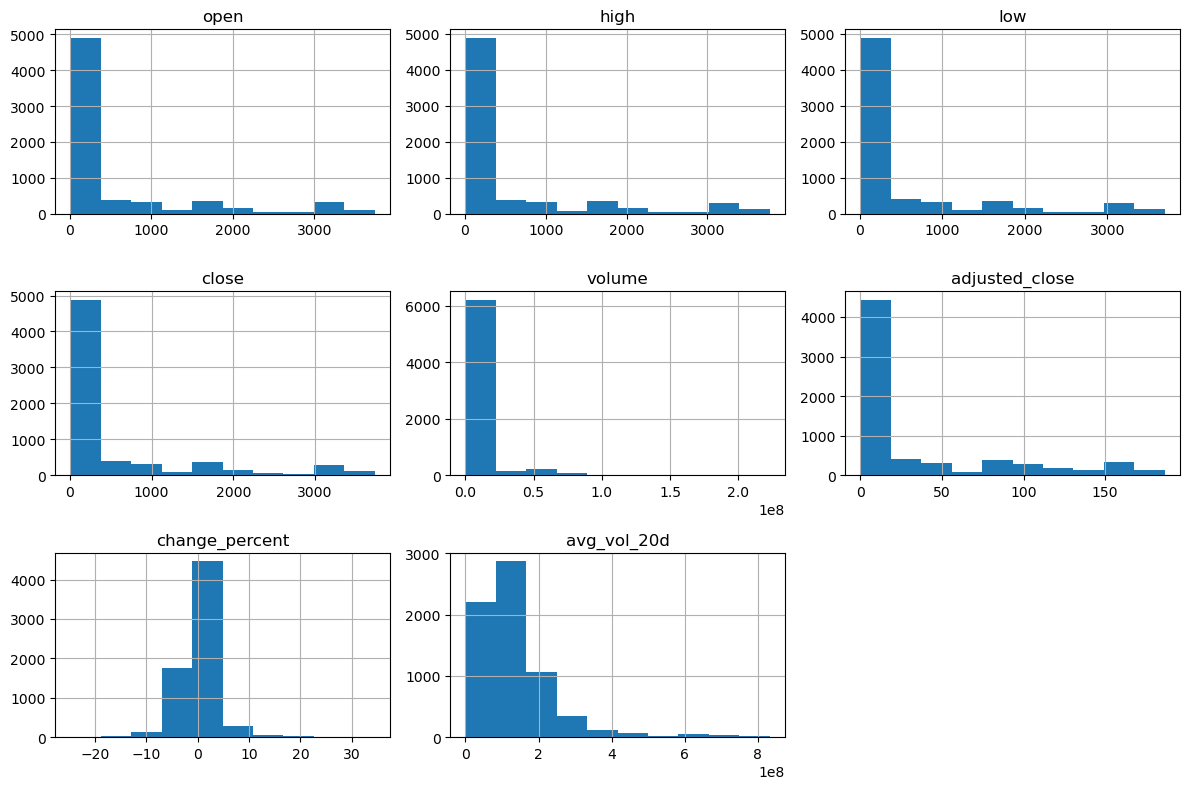

In [70]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Histogramas para las variables numéricas

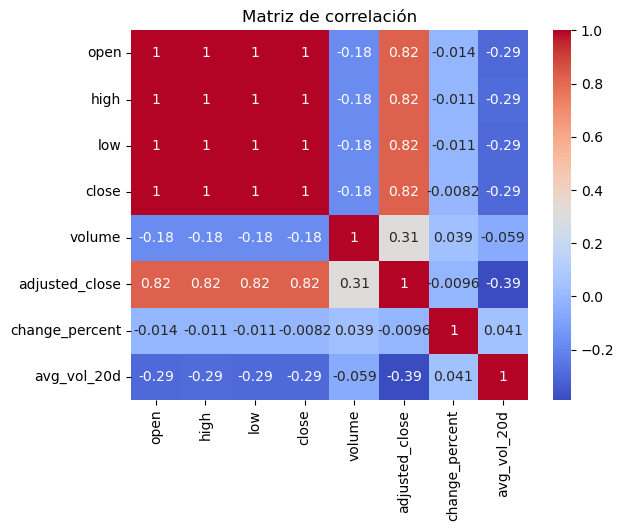

In [59]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


/Users/antonioromero/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


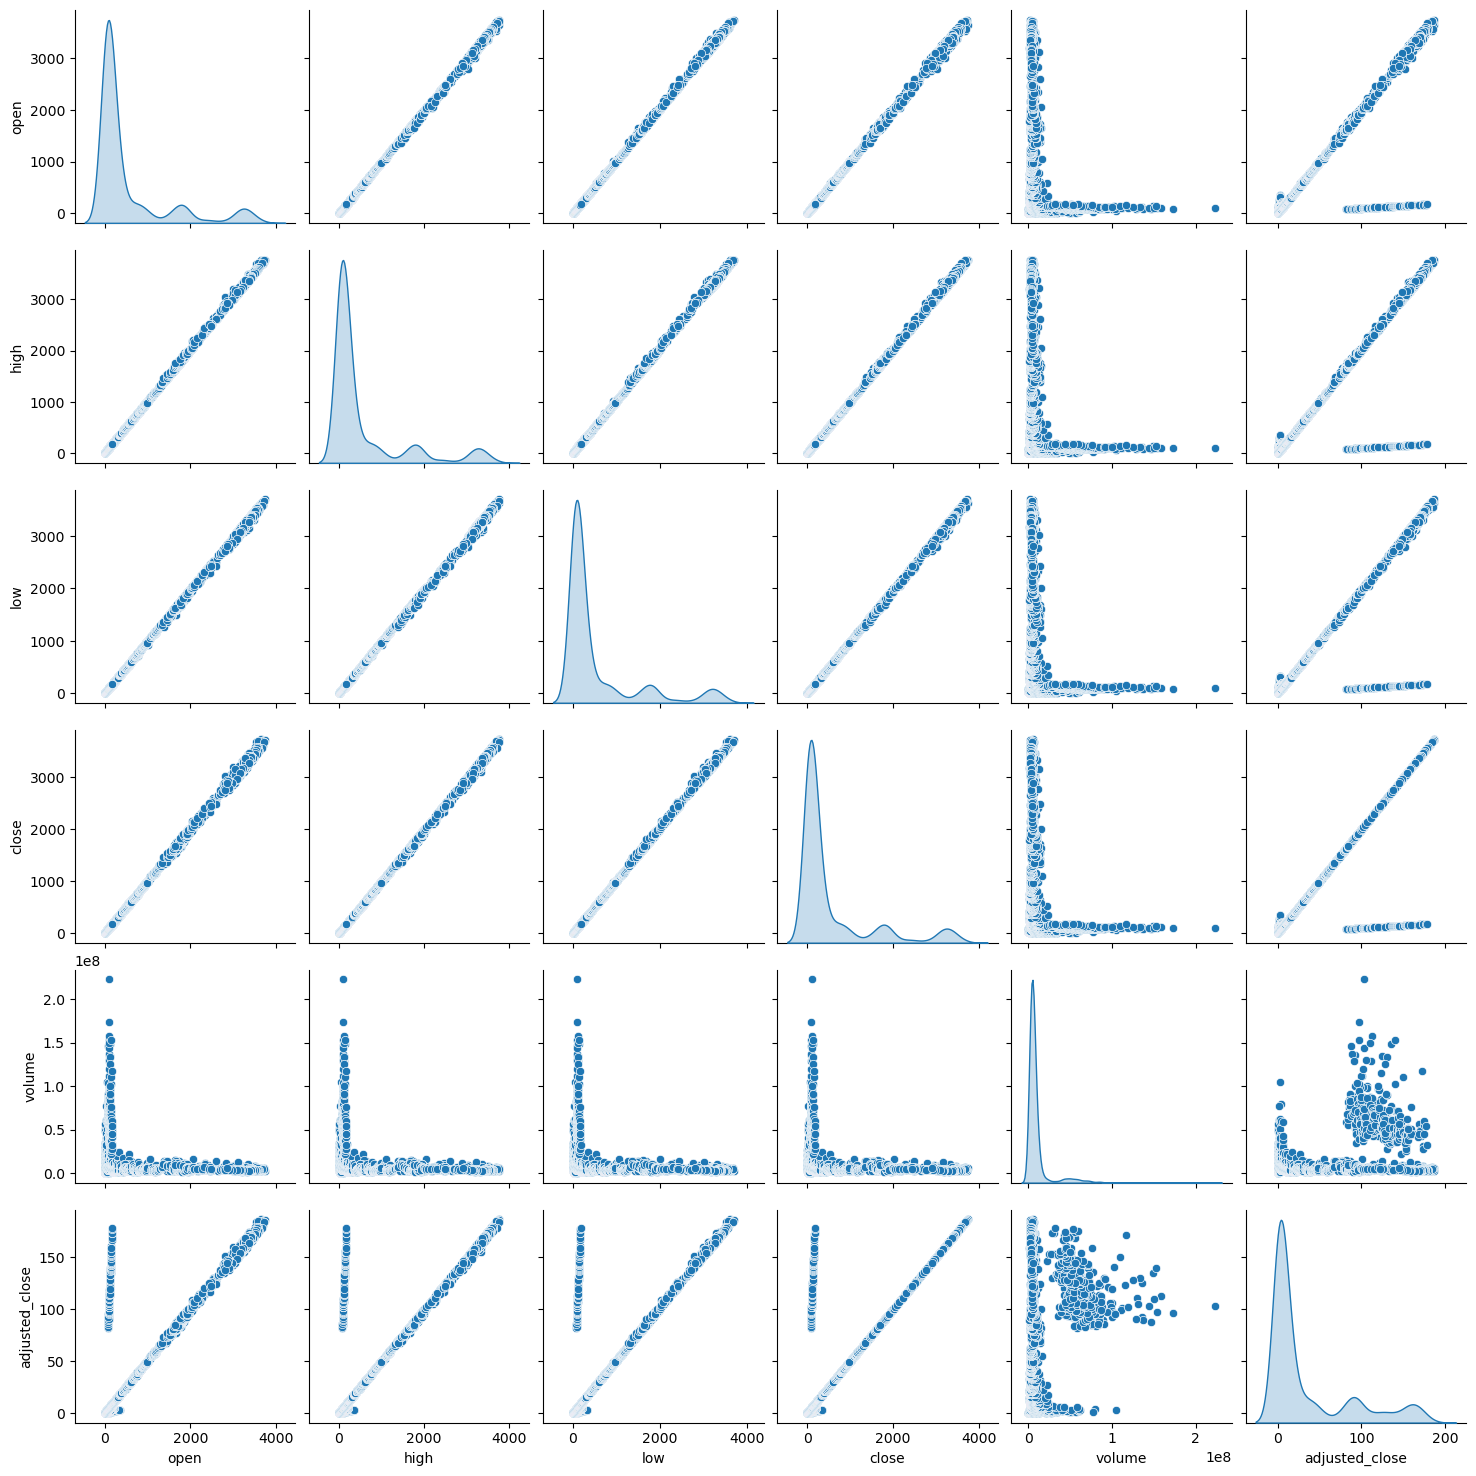

In [34]:
sns.pairplot(df[['open', 'high', 'low', 'close', 'volume', 'adjusted_close']], diag_kind='kde')
plt.show()

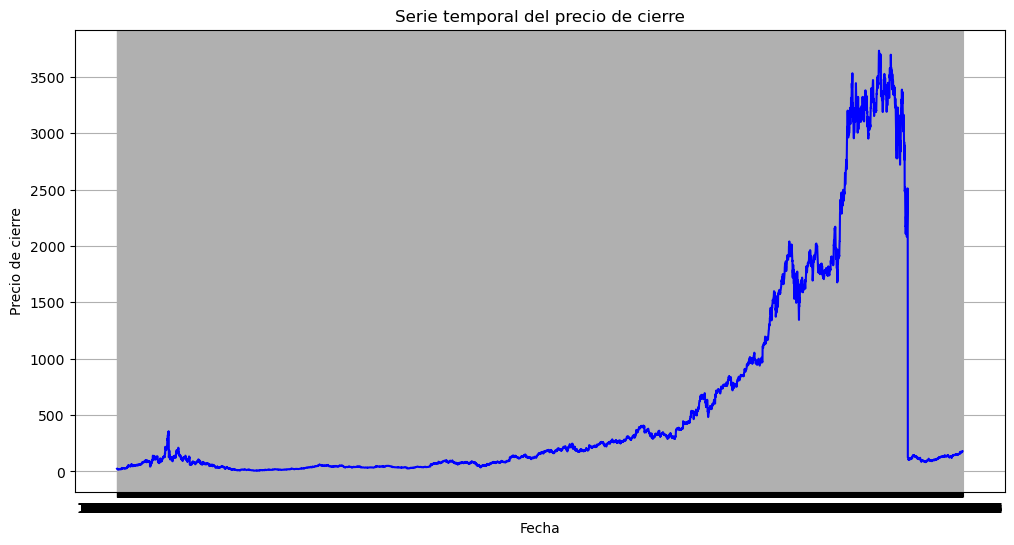

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], color='blue')
plt.title('Serie temporal del precio de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.grid(True)
plt.show()